# Neural Network for Students Admission Prediction

## Introduction
Predicting student admission based on various academic and exam-related factors is a crucial application of machine learning in the education sector. In this project, we employ a deep learning model using TensorFlow and Keras to analyze admission data and predict the likelihood of a student being admitted to a university program. This project focuses on using machine learning techniques to predict student admission chances based on various features, such as GRE scores, TOEFL scores, university ratings, and others. Using a dataset that provides historical data about student admissions, we can apply deep learning techniques, specifically a neural network, to predict whether a student will be admitted or not. In this notebook, we'll preprocess the data, perform exploratory data analysis (EDA), and build a neural network model using TensorFlow and Keras.
The workflow includes:

1. **Data Exploration and Preprocessing:** Load and examine the dataset, clean missing values (if any), and normalize the data.
2. **Feature Engineering:** Select relevant features and scale them appropriately.
3. **Model Design:** Construct a neural network with optimized architecture.
4. **Training and Evaluation:** Train the model using the training dataset and evaluate performance using key metrics.
5. **Visualization and Insights:** Generate EDA plots and analyze model accuracy and predictions.

---

#### Libraries and required importations

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score

#### Load data and explore basic information

In [5]:
data = pd.read_csv('Admission_Predict.csv')

In [6]:
print("\nBasic Data Overview", data.head(3))
print("\nBasic Data Descrption",data.describe())
print("\nDataset Shape: rows x columns in total", data.shape)
print("\nData types for each column", data.dtypes)


Basic Data Overview    Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  

Basic Data Descrption        Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  308.000000   103.000000           2.000000    2.500000   
50%    200.500000  317.000000   107.000000           3.00

#### Visualization and Exploratory Data Analysis (EDA)


- Visualize correlation matrix

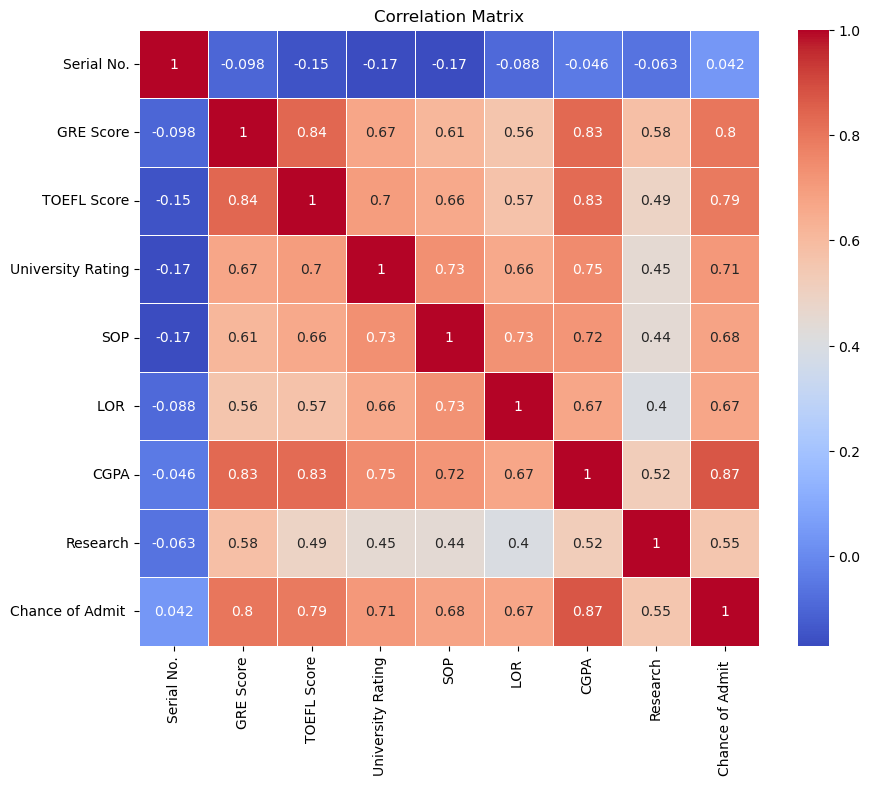

In [9]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

- Pair plot of the most important features

<Figure size 1200x1000 with 0 Axes>

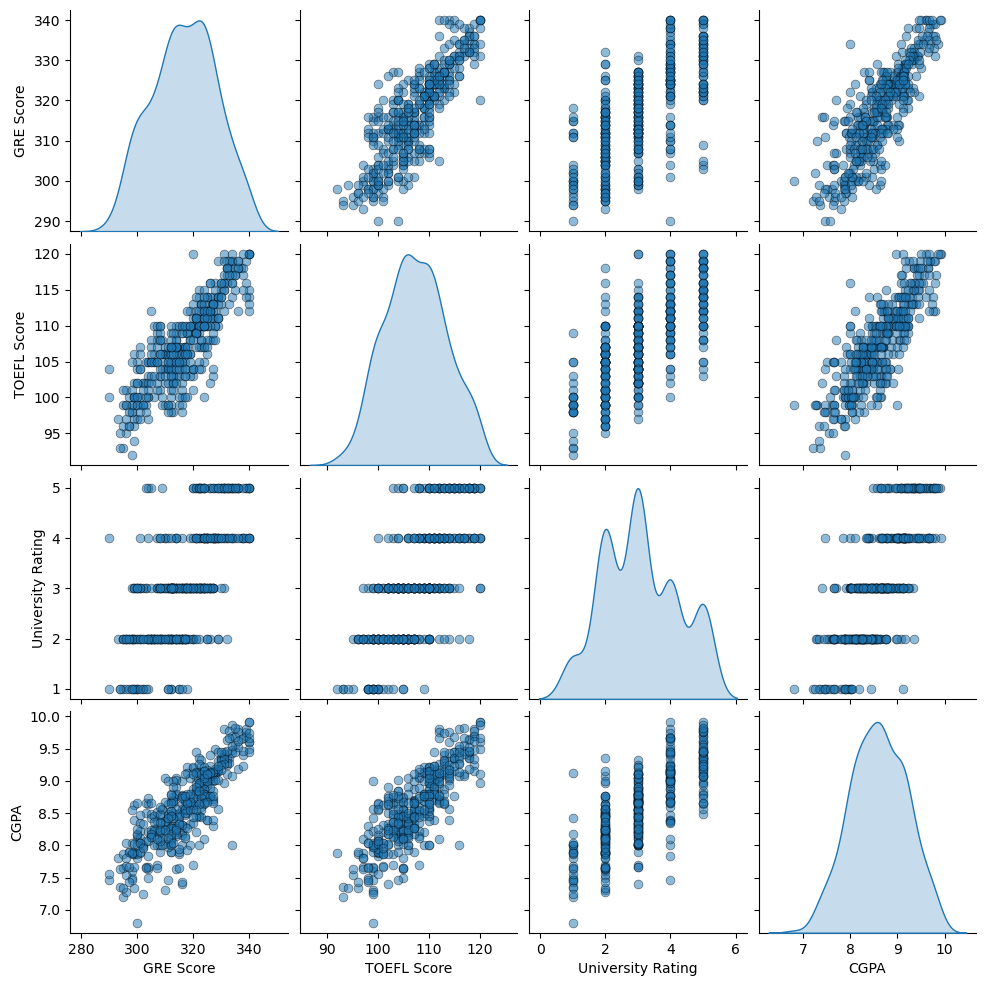

In [11]:
selected_features = ["GRE Score", "TOEFL Score", "University Rating", "CGPA"]
plt.figure(figsize=(12, 10))
sns.pairplot(data[selected_features], diag_kind='kde', plot_kws={'alpha':0.5, 's':40, 'edgecolor':'k'})
plt.show()

#### Subset predicted label and features

In [13]:
labels = data.iloc[:, -1]  # Our predicted target value (last column)
features = data.iloc[:, 1:8]  # Our features for prediction (all rows, columns 1-7)

#### Split training and test set

In [15]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.25, random_state=42)

#### Scale and standardize features data by normalizing it so every column has equal weight

In [17]:
sc = StandardScaler()
features_train_scale = sc.fit_transform(features_train)
features_test_scale = sc.transform(features_test)

#### We define the neural network model with a function

In [19]:
def neural_model(feature_data):
    model = Sequential()
    num_features = feature_data.shape[1]
    model.add(tf.keras.Input(shape=(num_features,)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1))  # Output layer (for regression)
    
    opt = keras.optimizers.Adam(learning_rate=0.005)
    model.compile(loss='mse', metrics=['mae'], optimizer=opt)
    
    return model

#### We now will initialize the Neural Model and then perform some more improvements with hyperparameters

In [21]:
my_model = neural_model(features_train_scale)
print(my_model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 273 (1.07 KB)

 Trainable params: 273 (1.07 KB)

 Non-trainable params: 0 (0.00 B)

None


- we apply early stopping for better efficiency

In [23]:
stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=40)

- now we can fit the model with 100 epochs and a batch size of 8

In [25]:
history = my_model.fit(features_train_scale, labels_train.to_numpy(), epochs=100, batch_size=8, verbose=1, validation_split=0.25, callbacks=[stop])

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.4363 - mae: 0.5142 - val_loss: 0.0452 - val_mae: 0.1782
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0801 - mae: 0.2309 - val_loss: 0.0251 - val_mae: 0.1246
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0688 - mae: 0.2081 - val_loss: 0.0293 - val_mae: 0.1460
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0461 - mae: 0.1721 - val_loss: 0.0249 - val_mae: 0.1340
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0416 - mae: 0.1605 - val_loss: 0.0208 - val_mae: 0.1235
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0321 - mae: 0.1369 - val_loss: 0.0119 - val_mae: 0.0866
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0272 - mae: 0.1329 - val_loss: 0.0084 - val_mae: 0.0710
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0204 - mae: 0.1119 - val_loss: 0.0124 - val_mae: 0.0939
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.02

### Model Evaluation
- MAE value
- MSE value
- R2 Score

In [27]:
val_mse, val_mae = my_model.evaluate(features_test_scale, labels_test.to_numpy(), verbose=0)
print("MAE: ", val_mae)
print("MSE: ", val_mse)

MAE:  0.0591377392411232
MSE:  0.006377088371664286


In [28]:
y_pred = my_model.predict(features_test_scale)
print("R-squared: ", r2_score(labels_test, y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R-squared:  0.7298552407798335


#### Finally we can visualize the model's performance in a plot and focus on the Train and Validation values

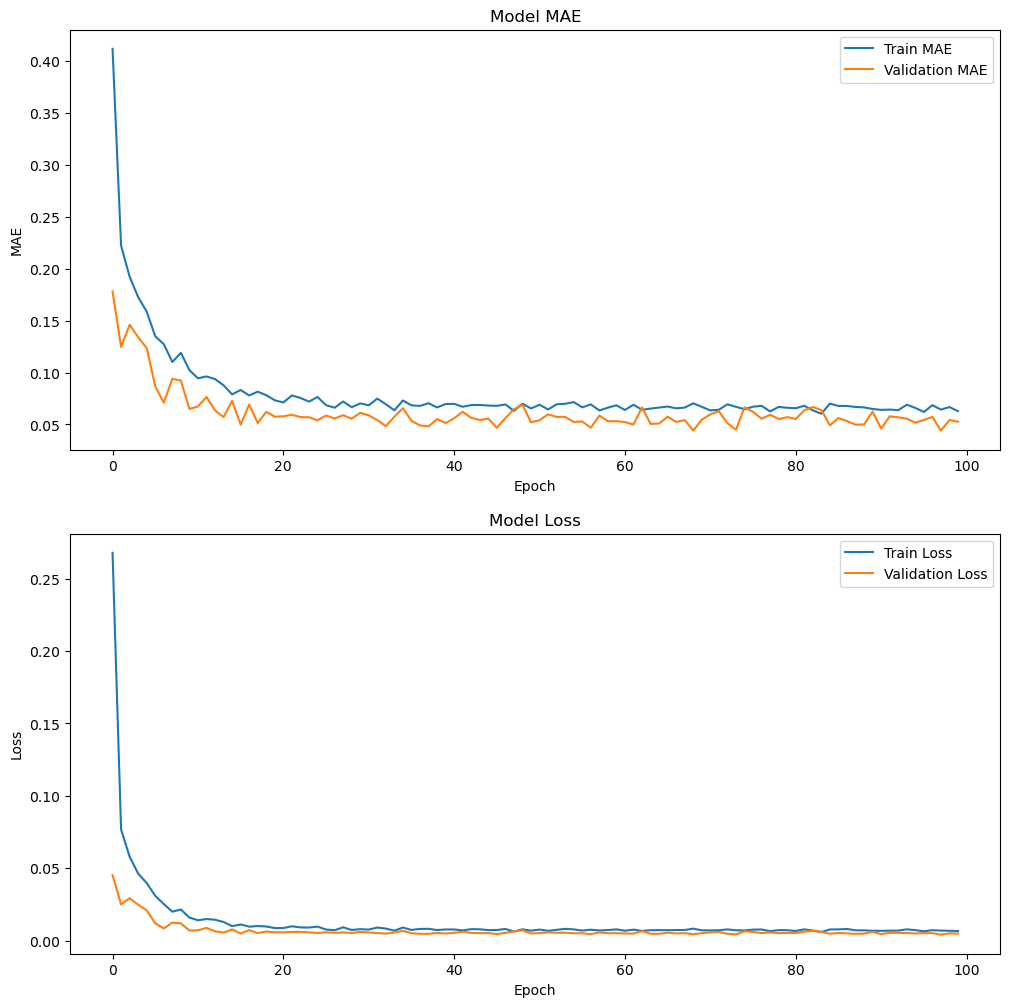

In [30]:
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# MAE plot
axs[0].plot(history.history['mae'], label='Train MAE')
axs[0].plot(history.history['val_mae'], label='Validation MAE')
axs[0].set_title('Model MAE')
axs[0].set_ylabel('MAE')
axs[0].set_xlabel('Epoch')
axs[0].legend()

# Loss plot
axs[1].plot(history.history['loss'], label='Train Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend()

plt.show()

## Conclusion and Insights
### **Key Findings**
1. **Feature Importance:** The correlation matrix showed that CGPA, GRE, and TOEFL scores had the strongest influence on admission chances.
2. **Model Performance:**
   - MAE (Mean Absolute Error) and MSE (Mean Squared Error) indicate the model’s predictive accuracy.
   - R-squared score suggests that the model explains a significant portion of the variance in admission outcomes.
3. **Neural Network Optimization:**
   - Increasing hidden layers and adding dropout layers improved performance.
   - Using early stopping prevented overfitting and improved generalization.

### **Future Improvements**
- **Feature Engineering:** Additional transformations or polynomial features could further refine predictions.
- **Hyperparameter Tuning:** Optimizing batch size, activation functions, or learning rate may improve accuracy.
- **Data Augmentation:** More extensive datasets could enhance model generalization.

This project successfully demonstrates how deep learning can predict student admissions, providing valuable insights into the most influential factors in the decision-making process.